In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
#Import data check directory
df_1 = pd.read_excel('Appendix3.xlsx')
df_2 = pd.read_excel('dynamics_sample_data.xlsx')
df_1

,sigmar,sigma,lamda,Shan,Simp,Abund2,Stab1,Stab1_var,Stone,Stab2,...,DeltaRAO1,DeltaRAO5,DeltaRAO10,DeltaRAO50,DeltaRAO100,DeltaRAO200,RAO_mean,RAO_var,Eigen_mean,Eigen_var
0,0.536935,0.29414,0.742032,3.098073,0.076658,3.877413,48.466317,9.939821e+03,28.953484,14.476742,...,5.186084,5.297450,5.145304,5.206115,5.989875,6.706979,17.154563,30.600995,9.109429,1.317372
1,0.536935,0.29414,2.484732,3.331790,0.062035,7.152953,1061.239434,1.447838e+07,34.449765,17.224882,...,6.290723,6.254764,6.341356,7.313085,5.335573,6.432131,25.017021,37.358198,11.063361,1.123278
2,0.536935,0.29414,0.341722,2.953433,0.082468,2.965940,22.762864,5.418102e+02,25.883885,12.941942,...,2.421149,2.482695,3.319406,3.222361,2.427083,3.284610,11.987500,26.118940,7.807179,1.136538
3,0.536935,0.29414,0.305252,2.900786,0.086412,2.871603,22.000395,4.332291e+02,26.552176,13.276088,...,3.828295,3.894838,3.650762,4.553892,5.014105,5.255834,11.890988,21.614649,6.972030,0.911100
4,0.536935,0.29414,3.365534,3.384642,0.057540,8.498170,5109.224373,1.790024e+09,36.700269,18.350134,...,9.475979,9.274796,8.844067,7.891699,8.597864,8.078331,26.364429,40.556911,10.823193,1.072112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.577255,0.15826,1.566830,3.770389,0.040714,7.937715,400.974118,2.040769e+06,57.193915,28.596957,...,5.420906,5.496882,5.305921,5.774707,5.488439,5.575656,18.927287,24.446170,9.976235,0.529203
996,0.577255,0.15826,1.533918,3.785445,0.040253,7.796550,333.153051,1.376287e+06,54.541297,27.270648,...,4.830908,4.799119,4.692146,5.338286,5.255795,4.896616,19.118218,22.569016,10.448788,1.156682
997,0.577255,0.15826,3.362893,3.893084,0.036199,11.195464,7994.267962,2.105327e+09,66.172760,33.086380,...,4.276374,4.878642,5.028112,5.323745,5.032928,5.524783,24.024950,24.150211,10.303667,0.836946
998,0.577255,0.15826,0.498928,3.568036,0.044850,5.297451,52.013940,6.158758e+03,45.835100,22.917550,...,5.100862,5.152355,5.323118,5.883406,6.744269,5.822496,11.222765,18.160004,7.961671,1.153383


In [4]:
df_1.columns

Index(['sigmar', 'sigma', 'lamda', 'Shan', 'Simp', 'Abund2', 'Stab1',
       'Stab1_var', 'Stone', 'Stab2', 'Stab2_var', 'Stab3', 'Stab3_var',
       'Stab4', 'Stab4_var', 'Stab5', 'Stab5_var', 'Stab6', 'Stab7',
       'New_formula', 'New_formula1', 'Current_sp', 'j_form', 'Current_sp_var',
       'Trait_var', 'trait_mean', 'Aij', 'Aij_var', 'Ri', 'Ri_var', 'Introd',
       'Introd_var', 'Jaccard_lag1', 'Jaccard_lag5', 'Jaccard_lag10',
       'Jaccard_lag50', 'Jaccard_lag100', 'Jaccard_lag200', 'DeltaRAO1',
       'DeltaRAO5', 'DeltaRAO10', 'DeltaRAO50', 'DeltaRAO100', 'DeltaRAO200',
       'RAO_mean', 'RAO_var', 'Eigen_mean', 'Eigen_var'],
      dtype='object')

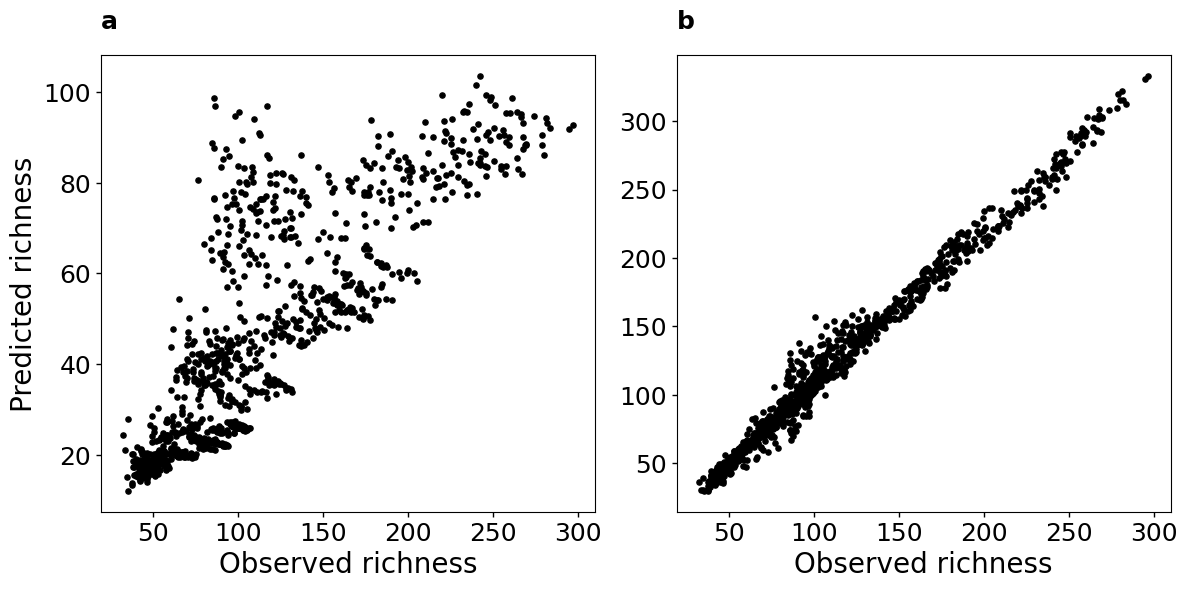

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Create the figure with adjusted figsize
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharex=True, sharey='none')

# Set the main title for the entire figure
#fig.suptitle("Your Figure Title", fontsize=24, fontweight='bold', x=0.05, y=0.95)
a=0.045*10000**(2/3)
print(a)
# Define the data and labels
data = [
    (df_1['Current_sp'], df_1['Stone'], 'a', r"$S_3$ "),
    
    (df_1['Current_sp'], a*df_1['New_formula1'], 'b', r"$\hat{S}=\sqrt{\hat{\lambda}\hat{R}\frac{(1-\mu_A)^2}{\sigma_A^2}}$"),
    
]

# Define the subplot labels
subplot_labels = ['a', 'b']

# Iterate over the subplots and data
for i, (ax, (x, y, title, equation)) in enumerate(zip(axs.flat, data)):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * np.array(x) + intercept

    # Plot scatter plot
    ax.scatter(x, y,s=14, color='black',label='Data')

    # Plot regression line
    #ax.plot(x, line, color='red')
    # Add subplot label at the top left corner using 'top left' option
    ax.text(0, 1.1, subplot_labels[i], transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='left')
    # Add R-squared value as text
    r_squared = r_value**2
    #ax.annotate(f'$R^2$ = {r_squared:.2f}', xy=(0.6, 0.1), xycoords='axes fraction', fontsize=16)
    print(r_squared)

    # Add custom equation of the regression line
    #ax.text(0.2, 0.8, equation, transform=ax.transAxes, fontsize=20, color='black')

    if i%2==0:
        # Add labels and legend
        ax.set_ylabel('Predicted richness', fontsize=20, color='black')

    # Add subplot label
    #ax.text(0.05, 0.95, subplot_labels[i], transform=ax.transAxes, fontsize=18, fontweight='bold', va='top')

    # Increase the font size of the tick labels
    ax.tick_params(axis='both', labelsize=18)

    # Bolden the tick labels
    ax.xaxis.set_tick_params(which='both', width=1)
    ax.yaxis.set_tick_params(which='both', width=1)

    # Add x-axis label to bottom row subplots
    ax.set_xlabel('Observed richness', fontsize=20, color='black')

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot as a PNG image
plt.savefig('rich_com.png', dpi=900)

# Show the plot
plt.show()


## supplementary graphs

In [8]:
df_Jvar = pd.read_excel('data_J_values_richness1.xlsx')


In [9]:
df_Jvar.columns

Index(['J_1000 ', 'J_3000  ', 'J_5000', 'J_7000 ', 'J_9000 ', 'J_11000',
       'J_13000', 'J_15000', 'J_17000', 'J_19000'],
      dtype='object')

In [10]:
J= [1000, 3000, 5000, 7000, 9000, 11000, 13000, 15000, 17000, 19000]

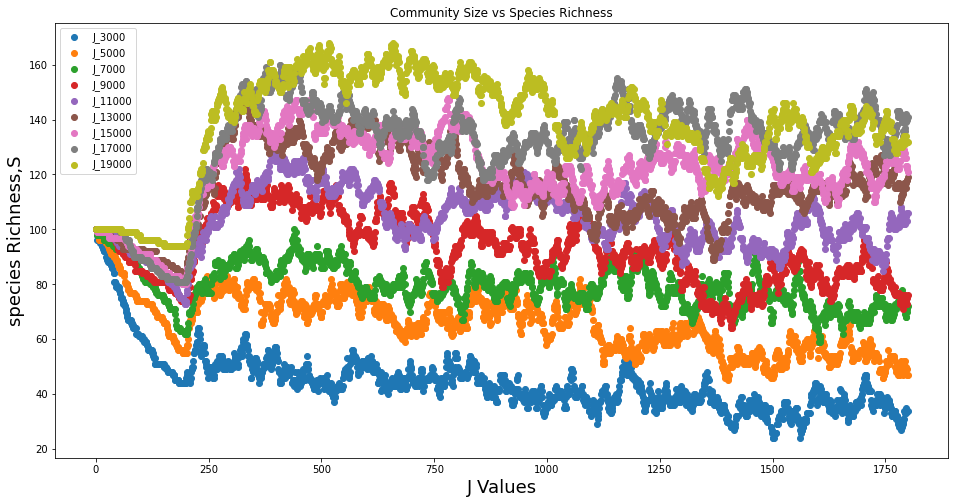

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with columns 'J', 'Column1', 'Column2', ..., 'Column10'
# If not, replace these column names with your actual column names.

# Create a single plot for all 10 columns
plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

# Iterate through columns and plot them
for col in df_Jvar.columns[1:]:
    plt.scatter(df_Jvar.index, df_Jvar[col], label=col)

# Add labels and legend
plt.xlabel('J Values',fontsize=18)
plt.ylabel('species Richness,S',fontsize=18)
plt.legend()
plt.title('Community Size vs Species Richness')

# Set x-axis ticks as corresponding J values
#plt.xticks(df_Jvar.index, J)

# Show the plot
#plt.grid(True)
plt.show()


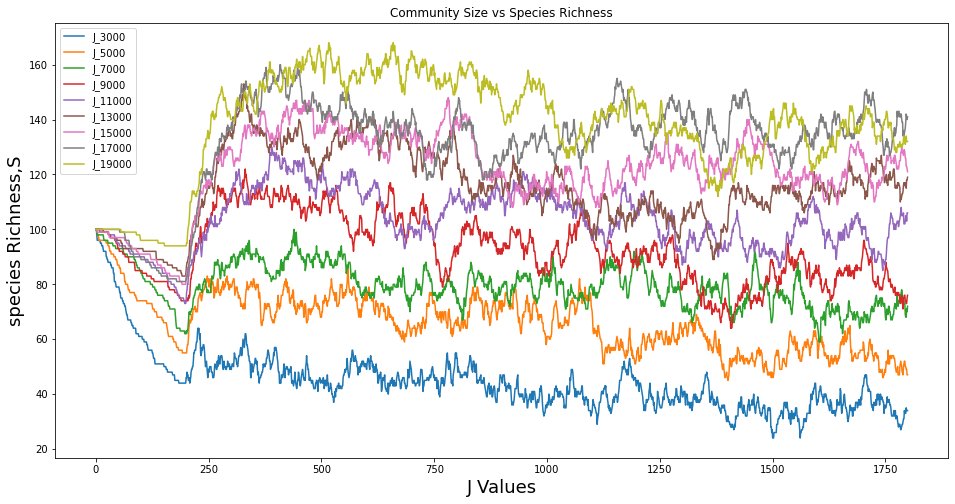

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with columns 'J', 'Column1', 'Column2', ..., 'Column10'
# If not, replace these column names with your actual column names.

# Create a single plot for all 10 columns
plt.figure(figsize=(16, 8))  # Adjust the figure size as needed

# Iterate through columns and plot them
for col in df_Jvar.columns[1:]:
    plt.plot(df_Jvar.index, df_Jvar[col], label=col)

# Add labels and legend
plt.xlabel('J Values',fontsize=18)
plt.ylabel('species Richness,S',fontsize=18)
plt.legend()
plt.title('Community Size vs Species Richness')

# Set x-axis ticks as corresponding J values
#plt.xticks(df_Jvar.index, J)

# Show the plot
#plt.grid(True)
plt.show()


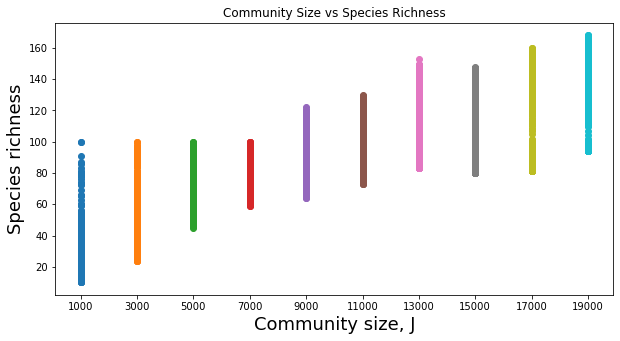

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have a DataFrame df with columns 'Column1', 'Column2', ..., 'Column10'
# If not, replace these column names with your actual column names.

# Create the list J
J = [1000, 3000, 5000, 7000, 9000, 11000, 13000, 15000, 17000, 19000]

# Calculate the mean of the DataFrame columns
column_means = df_Jvar.mean(axis=0)

# Create a single plot for all 10 columns
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

# Iterate through columns and plot them
for i, col in enumerate(df_Jvar.columns[0:], start=1):
    plt.scatter([i] * len(df_Jvar), df_Jvar[col], label=col)

# Add labels and legend
plt.xlabel('Community size, J',fontsize=18)
plt.ylabel('Species richness',fontsize=18)
#plt.legend()
plt.title('Community Size vs Species Richness')
#J =[1000,3000,5000,7000,9000,11000,13000,15000,17000,19000]
# Set x-axis ticks as the column names
plt.xticks(range(1, len(df_Jvar.columns[0:]) + 1), J[0:], rotation=0)  # Rotate x-axis labels for readability

# Show the plot
#plt.grid(True)
plt.show()


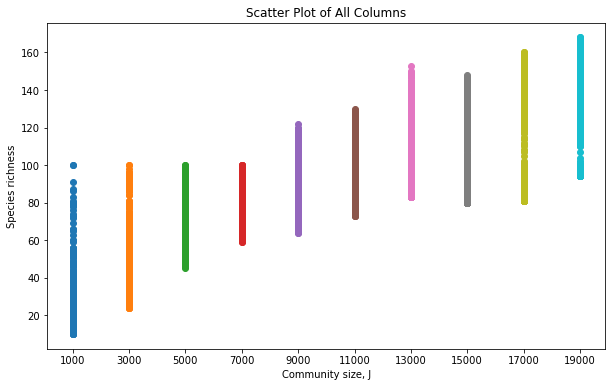

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have a DataFrame df with columns 'Column1', 'Column2', ..., 'Column10'
# If not, replace these column names with your actual column names.

# Create the list J
J = [1000, 3000, 5000, 7000, 9000, 11000, 13000, 15000, 17000, 19000]

# Calculate the mean of the DataFrame columns
column_means = df_Jvar.mean(axis=0)

X = pd.DataFrame({'J': J})
y = column_means
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
# Create a single plot for all 10 columns
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Iterate through columns and plot them
for i, col in enumerate(df_Jvar.columns[0:], start=1):
    plt.scatter([i] * len(df_Jvar), df_Jvar[col], label=col)

# Add labels and legend
plt.xlabel('Community size, J')
plt.ylabel('Species richness')
#plt.legend()
plt.title('Scatter Plot of All Columns')
plt.annotate(f'R^2 = {r_squared:.2f}',(J[0], df_Jvar[col].max()))
# Set x-axis ticks as the column names
plt.xticks(range(1, len(df_Jvar.columns[0:]) + 1), J[0:], rotation=0)  # Rotate x-axis labels for readability

# Show the plot
#plt.grid(True)
plt.show()

In [29]:
r_squared 

0.9600503093244428

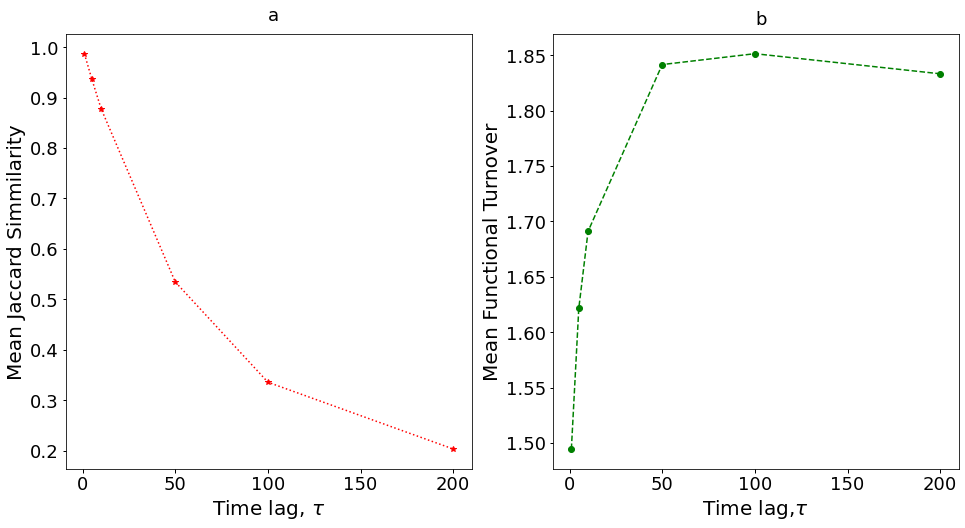

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df' and contains the five columns of interest
columns_of_interest = ['Jaccard_lag1', 'Jaccard_lag5', 'Jaccard_lag10', 'Jaccard_lag50', 'Jaccard_lag100','Jaccard_lag200']  # Replace with actual column names

# Select the five columns from the dataframe
selected_columns = df_1[columns_of_interest]

# Calculate the mean of each column
column_means = selected_columns.mean()

# Assuming your dataframe is named 'df' and contains the five columns of interest
columns_of_interest1 = ['DeltaRAO1', 'DeltaRAO5', 'DeltaRAO10', 'DeltaRAO50', 'DeltaRAO100','DeltaRAO200']  # Replace with actual column names

# Select the five columns from the dataframe
selected_columns1 = df_1[columns_of_interest1]

# Calculate the mean of each column
column_means1 = selected_columns1.mean()

c=[1,5,10,50,100,200]

# Create the figure with adjusted figsize
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharex=True, sharey='none')

# Plotting the column means
axs[0].plot(c, column_means, color='red',ls=":", marker="*",alpha=1)
axs[0].set_ylabel("Mean Jaccard Simmilarity", fontsize= 20)
axs[0].set_xlabel(r"Time lag, $\tau$", fontsize =20)
# Increase the font size of the tick labels
axs[0].tick_params(axis='both', labelsize=18)
# Add subplot label
axs[0].text(100, 1.08,"a", fontsize=18, va='top')

# Bolden the tick labels
axs[0].xaxis.set_tick_params(which='both', width=1)
axs[0].yaxis.set_tick_params(which='both', width=1)
axs[1].plot(c, column_means1,color='green',marker='o',ls="--")
axs[1].set_ylabel("Mean Functional Turnover", fontsize= 20)
axs[1].set_xlabel(r"Time lag,$\tau$", fontsize =20)
# Increase the font size of the tick labels
axs[1].tick_params(axis='both', labelsize=18)
axs[1].text(100, 1.89,"b", fontsize=18, va='top')
# Bolden the tick labels
axs[1].xaxis.set_tick_params(which='both', width=1)
axs[1].yaxis.set_tick_params(which='both', width=1)
#plt.xlabel('Lags')
#plt.ylabel('Mean')
plt.show()



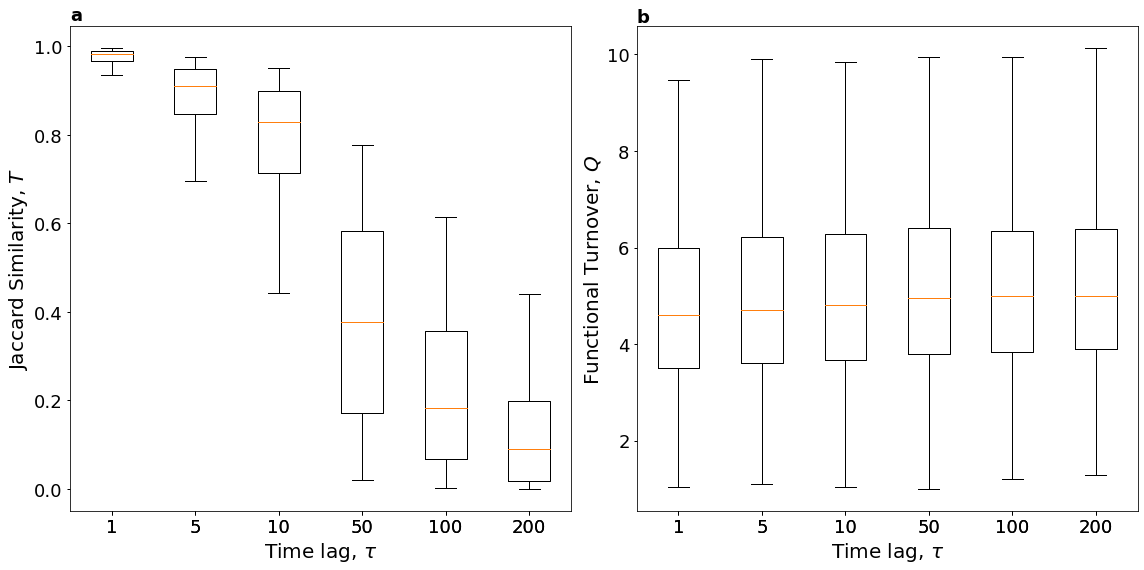

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming your dataframe is named 'df' and contains the columns of interest
columns_of_interest = ['Jaccard_lag1', 'Jaccard_lag5', 'Jaccard_lag10', 'Jaccard_lag50', 'Jaccard_lag100', 'Jaccard_lag200']

# Create the figure with adjusted figsize
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharex=True, sharey='none')

# Box plots for Jaccard Similarity
axs[0].boxplot(df_1[columns_of_interest].values, labels=['1', '5', '10', '50', '100', '200'], showfliers=False)
axs[0].set_ylabel(r"Jaccard Similarity, $T$", fontsize=20)
axs[0].set_xlabel(r"Time lag, $\tau$", fontsize=20)
axs[0].tick_params(axis='both', labelsize=18)
axs[0].xaxis.set_tick_params(which='both', width=1)
axs[0].yaxis.set_tick_params(which='both', width=1)
axs[0].text(0.5, 1.09, "a", fontsize=18, fontweight='bold', va='top', ha='left')
#axs[0].text(0, 1.1, 'a' ,rm=axs.transAxes, fontsize=18, fontweight='bold', va='top', ha='left')
# Assuming your dataframe is named 'df' and contains the columns of interest for Functional Turnover
columns_of_interest1 = ['DeltaRAO1', 'DeltaRAO5', 'DeltaRAO10', 'DeltaRAO50', 'DeltaRAO100', 'DeltaRAO200']

# Box plots for Functional Turnover
axs[1].boxplot(df_1[columns_of_interest1].values,labels=['1', '5', '10', '50', '100', '200'],showfliers=False)
axs[1].set_ylabel(r"Functional Turnover, $Q$", fontsize=20)
axs[1].set_xlabel(r"Time lag, $\tau$", fontsize=20)
axs[1].tick_params(axis='both', labelsize=18)
axs[1].xaxis.set_tick_params(which='both', width=1)
axs[1].yaxis.set_tick_params(which='both', width=1)
axs[1].text(0.5, 10.95, "b", fontsize=18, fontweight='bold', va='top', ha='left')

# Set the overall title for the subplot
#plt.suptitle('Subplots of Boxplots for Two Datasets')
#axs[1].text(0, 1.1, 'b', transform=axs.transAxes, fontsize=18, fontweight='bold', va='top', ha='left')
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [73]:

df_1['new_form']= df_1['Stab7']**3


In [8]:
df_1['Prod_n']=None
for index, row in df_1.iterrows():
    product= row['Introd']*row['Ri']*row['Stab7']
    df_1.at[index, 'Prod_n'] = product

In [23]:
df_1['Prod_n']

0       4.983666
1       16.59551
2       2.458016
3       2.494029
4      26.810068
         ...    
995    25.221781
996    22.495063
997    51.685771
998     6.524811
999      5.22537
Name: Prod_n, Length: 1000, dtype: object

In [24]:
df_1['new'] = (df_1['Prod_n']**0.5)*100

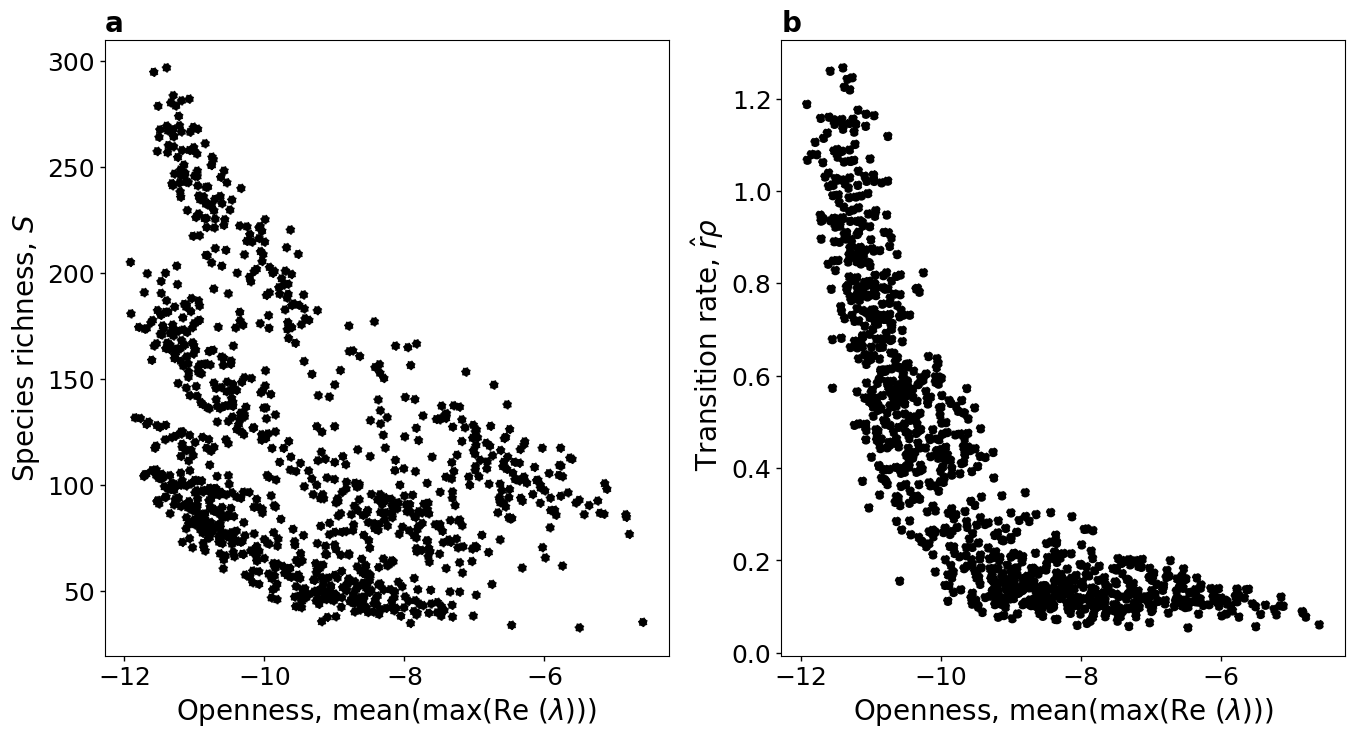

In [15]:
# Create the figure with adjusted figsize
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharex=True, sharey='none')

# Plotting the column means
axs[0].scatter(-1*df_1['Eigen_mean'],df_1['Current_sp'],ls=":", color = 'black',marker="o",alpha=1)
axs[0].set_ylabel(r"Species richness, $S$", fontsize= 20)
axs[0].set_xlabel(r"Openness, mean(max(Re ($\lambda$)))", fontsize =20)
# Increase the font size of the tick labels
axs[0].tick_params(axis='both', labelsize=18)
# Add subplot label
#axs[0].text(25, 1,"a", fontsize=18, va='top')
# Bolden the tick labels
axs[0].xaxis.set_tick_params(which='both', width=1)
axs[0].yaxis.set_tick_params(which='both', width=1)
# Setting x-axis limits for scatter plots
#axs[0].set_xlim(0.95, 1)
axs[1].scatter(-1*df_1['Eigen_mean'],df_1["Prod_I_R"],marker='o', color='black',ls="--")
axs[1].set_ylabel(r" Transition rate, $\hat{r}\rho$", fontsize= 20)
axs[1].set_xlabel(r"Openness, mean(max(Re ($\lambda$)))", fontsize =20)
# Increase the font size of the tick labels
axs[1].tick_params(axis='both', labelsize=18)
#axs[1].text(25, 1.54,"b", fontsize=18, va='top')
# Bolden the tick labels
axs[1].xaxis.set_tick_params(which='both', width=1)
axs[1].yaxis.set_tick_params(which='both', width=1)
# Set titles for subplots
axs[0].set_title("a", fontsize=20,loc="left",fontweight='bold')
axs[1].set_title("b", fontsize=20,loc="left",fontweight='bold')
plt.show()
#plt.xlabel('Lags')
#plt.ylabel('

In [8]:
df_1['Prod_I_R']=None
for index, row in df_1.iterrows():
    product= row['Introd']*row['Ri']
    df_1.at[index, 'Prod_I_R'] = product

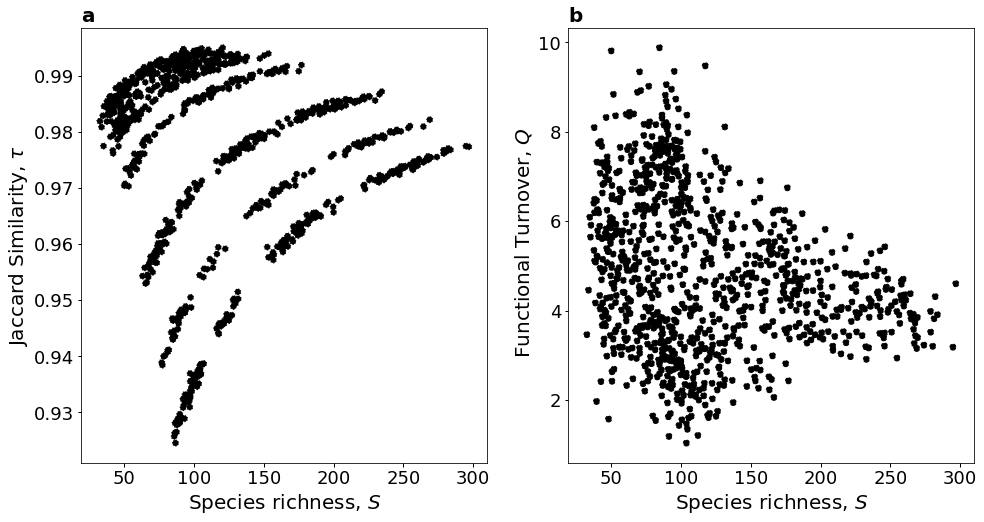

In [10]:
# Create the figure with adjusted figsize
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharex=True, sharey='none')

# Plotting the column means
axs[0].scatter(df_1['Current_sp'],df_1['Jaccard_lag1'],ls=":", color = 'black',marker="o",alpha=1)
axs[0].set_ylabel(r"Jaccard Similarity, $\tau$", fontsize= 20)
axs[0].set_xlabel(r"Species richness, $S$", fontsize =20)
# Increase the font size of the tick labels
axs[0].tick_params(axis='both', labelsize=18)
# Add subplot label
#axs[0].text(25, 1,"a", fontsize=18, va='top')
# Bolden the tick labels
axs[0].xaxis.set_tick_params(which='both', width=1)
axs[0].yaxis.set_tick_params(which='both', width=1)
# Setting x-axis limits for scatter plots
#axs[0].set_xlim(0.95, 1)
axs[1].scatter(df_1['Current_sp'],df_1["DeltaRAO1"],marker='o', color='black',ls="--")
axs[1].set_ylabel(r" Functional Turnover, $Q$", fontsize= 20)
axs[1].set_xlabel(r"Species richness, $S$", fontsize =20)
# Increase the font size of the tick labels
axs[1].tick_params(axis='both', labelsize=18)
#axs[1].text(25, 1.54,"b", fontsize=18, va='top')
# Bolden the tick labels
axs[1].xaxis.set_tick_params(which='both', width=1)
axs[1].yaxis.set_tick_params(which='both', width=1)
# Set titles for subplots
axs[0].set_title("a", fontsize=20,loc="left",fontweight='bold')
axs[1].set_title("b", fontsize=20,loc="left",fontweight='bold')
plt.show()
#plt.xlabel('Lags')
#plt.ylabel('

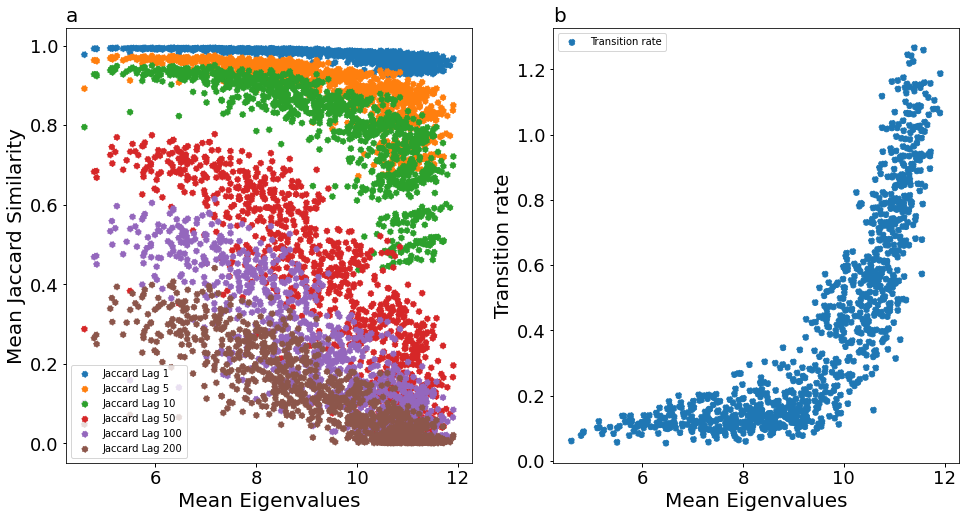

In [66]:
import matplotlib.pyplot as plt

# Create the figure with adjusted figsize
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharex=True, sharey='none')

# Plotting the column means
scatter1 = axs[0].scatter(df_1['Eigen_mean'], df_1['Jaccard_lag1'], ls=":", marker="o", alpha=1, label='Jaccard Lag 1')
scatter2 = axs[0].scatter(df_1['Eigen_mean'], df_1['Jaccard_lag5'], ls=":", marker="o", alpha=1, label='Jaccard Lag 5')
scatter2 = axs[0].scatter(df_1['Eigen_mean'], df_1['Jaccard_lag10'], ls=":", marker="o", alpha=1, label='Jaccard Lag 10')
scatter2 = axs[0].scatter(df_1['Eigen_mean'], df_1['Jaccard_lag50'], ls=":", marker="o", alpha=1, label='Jaccard Lag 50')
scatter2 = axs[0].scatter(df_1['Eigen_mean'], df_1['Jaccard_lag100'], ls=":", marker="o", alpha=1, label='Jaccard Lag 100')
scatter2 = axs[0].scatter(df_1['Eigen_mean'], df_1['Jaccard_lag200'], ls=":", marker="o", alpha=1, label='Jaccard Lag 200')


axs[0].set_ylabel("Jaccard Similarity", fontsize=20)
axs[0].set_xlabel("Mean Eigenvalues", fontsize=20)
axs[0].tick_params(axis='both', labelsize=18)
#axs[0].text(25, 1, "(a)", fontsize=18, va='top')
axs[0].xaxis.set_tick_params(which='both', width=1)
axs[0].yaxis.set_tick_params(which='both', width=1)
axs[0].legend(loc='best')  # Add legend to subplot 0

scatter3 = axs[1].scatter(df_1['Eigen_mean'], df_1["Prod_I_R"], marker='o', ls="--", label='Transition rate')

axs[1].set_ylabel("Transition rate", fontsize=20)
axs[1].set_xlabel("Mean Eigenvalues", fontsize=20)
axs[1].tick_params(axis='both', labelsize=18)
#axs[1].text(25, 1.54, "(b)", fontsize=18, va='top')
axs[1].xaxis.set_tick_params(which='both', width=1)
axs[1].yaxis.set_tick_params(which='both', width=1)
axs[1].legend(loc='best')  # Add legend to subplot 1

# Set titles for subplots
axs[0].set_title("a", fontsize=20,loc="left")
axs[1].set_title("b", fontsize=20,loc="left")

plt.show()


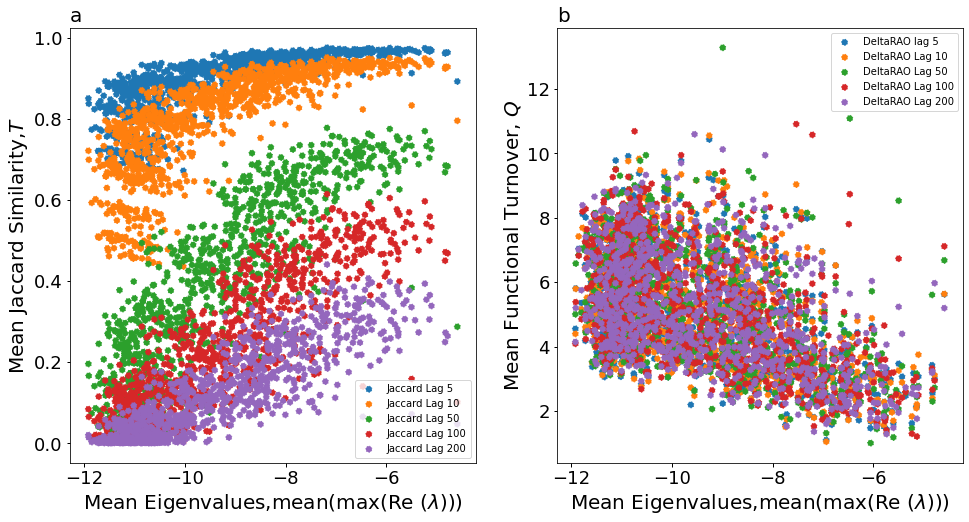

In [8]:
import matplotlib.pyplot as plt

# Create the figure with adjusted figsize
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharex=True, sharey='none')

# Plotting the column means
#scatter1 = axs[0].scatter(-1*df_1['Eigen_mean'], df_1['Jaccard_lag1'], ls=":", marker="o", alpha=1, label='Jaccard Lag 1')
scatter2 = axs[0].scatter(-1*df_1['Eigen_mean'], df_1['Jaccard_lag5'], ls=":", marker="o", alpha=1, label='Jaccard Lag 5')
scatter3 = axs[0].scatter(-1*df_1['Eigen_mean'], df_1['Jaccard_lag10'], ls=":", marker="o", alpha=1, label='Jaccard Lag 10')
scatter4 = axs[0].scatter(-1*df_1['Eigen_mean'], df_1['Jaccard_lag50'], ls=":", marker="o", alpha=1, label='Jaccard Lag 50')
scatter5 = axs[0].scatter(-1*df_1['Eigen_mean'], df_1['Jaccard_lag100'], ls=":", marker="o", alpha=1, label='Jaccard Lag 100')
scatter6 = axs[0].scatter(-1*df_1['Eigen_mean'], df_1['Jaccard_lag200'], ls=":", marker="o", alpha=1, label='Jaccard Lag 200')


axs[0].set_ylabel(r"Mean Jaccard Similarity,$T$", fontsize=20)
axs[0].set_xlabel(r"Mean Eigenvalues,mean(max(Re ($\lambda$)))", fontsize=20)
axs[0].tick_params(axis='both', labelsize=18)
#axs[0].text(25, 1, "(a)", fontsize=18, va='top')
axs[0].xaxis.set_tick_params(which='both', width=1)
axs[0].yaxis.set_tick_params(which='both', width=1)
axs[0].legend(loc='best')  # Add legend to subplot 0

# Plotting the column means
#scatter1 = axs[1].scatter(-1*df_1['Eigen_mean'], df_1['DeltaRAO1'], ls=":", marker="o", alpha=1, label='DeltaRAO lag 1')
scatter2 = axs[1].scatter(-1*df_1['Eigen_mean'], df_1['DeltaRAO5'], ls=":", marker="o", alpha=1, label='DeltaRAO lag 5')
scatter3 = axs[1].scatter(-1*df_1['Eigen_mean'], df_1['DeltaRAO10'], ls=":", marker="o", alpha=1, label='DeltaRAO Lag 10')
scatter4 = axs[1].scatter(-1*df_1['Eigen_mean'], df_1['DeltaRAO50'], ls=":", marker="o", alpha=1, label='DeltaRAO Lag 50')
scatter5= axs[1].scatter(-1*df_1['Eigen_mean'], df_1['DeltaRAO100'], ls=":", marker="o", alpha=1, label='DeltaRAO Lag 100')
scatter6 = axs[1].scatter(-1*df_1['Eigen_mean'], df_1['DeltaRAO200'], ls=":", marker="o", alpha=1, label='DeltaRAO Lag 200')

axs[1].set_ylabel(r"Mean Functional Turnover, $Q$", fontsize=20)
axs[1].set_xlabel(r"Mean Eigenvalues,mean(max(Re ($\lambda$)))", fontsize=20)
axs[1].tick_params(axis='both', labelsize=18)
#axs[1].text(25, 1.54, "(b)", fontsize=18, va='top')
axs[1].xaxis.set_tick_params(which='both', width=1)
axs[1].yaxis.set_tick_params(which='both', width=1)
axs[1].legend(loc='best')  # Add legend to subplot 1

# Set titles for subplots
axs[0].set_title("a", fontsize=20,loc="left")
axs[1].set_title("b", fontsize=20,loc="left")

plt.show()


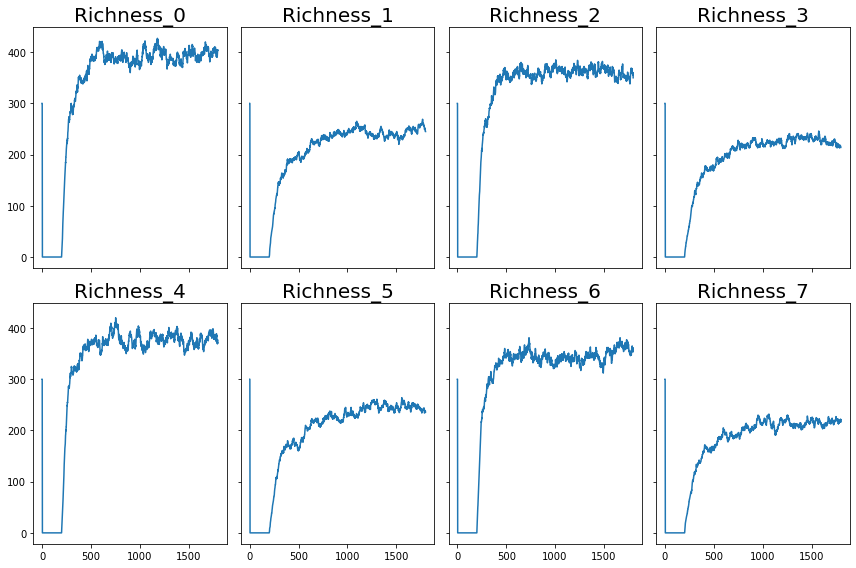

In [73]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'

# Get the number of columns in the DataFrame
num_columns = len(df_2.columns)

# Calculate the number of rows and columns for the subplots grid
num_rows = int(num_columns ** 0.5)  # You can adjust this as needed
num_cols = (num_columns + num_rows - 1) // num_rows

# Create subplots with specified alignment
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8), sharex=True, sharey=True)

# Set titles for each subplot
titles = df_2.columns

# Loop through columns and plot each one in a separate subplot with titles
for i, column in enumerate(df_2.columns):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].plot(df_2[column])
    axs[row, col].set_title(titles[i], fontsize=20)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


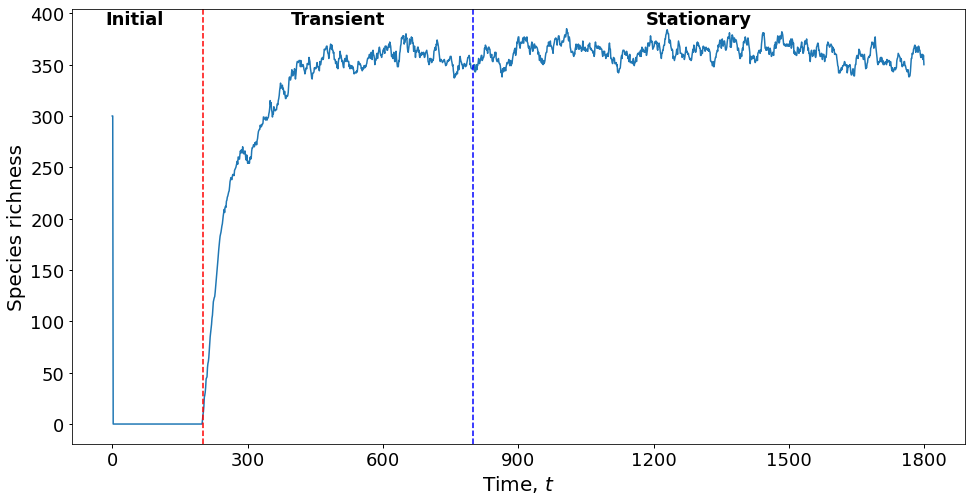

In [85]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called fina_df

# Create a figure and axes
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the data from the column
ax.plot(df_2['Richness_2'])

# Define the positions of vertical lines
initial_line = 200
transient_line = 800
stationary_line = 1800

# Add vertical lines at the specified positions
ax.axvline(x=initial_line, color='red', linestyle='--')
ax.axvline(x=transient_line, color='blue', linestyle='--')
#ax.axvline(x=stationary_line, color='green', linestyle='--')

# Set x-axis ticks
ax.set_xticks(range(0, 1800 + 1, 300))

# Set labels for x-axis and y-axis
ax.set_xlabel('Time, $t$', fontsize=20)
ax.set_ylabel('Species richness', fontsize=20)

# Increase the font size of the tick labels
ax.tick_params(axis='both', labelsize=18)

# Bolden the tick labels
ax.xaxis.set_tick_params(which='both', width=1)
ax.yaxis.set_tick_params(which='both', width=1)

# Add text labels for the ranges
ax.text(50, max(df_2['Richness_2'])+18, 'Initial', rotation=0, va='top', ha='center', fontsize=18,fontweight='bold')
ax.text((initial_line + transient_line) / 2, max(df_2['Richness_2'])+18, 'Transient', rotation=0, va='top', ha='center', fontsize=18,fontweight='bold')
ax.text((transient_line + stationary_line) / 2,max(df_2['Richness_2'])+18, 'Stationary', rotation=0, va='top', ha='center', fontsize=18,fontweight='bold')

# Save the plot as a PNG image
plt.savefig('local_com.png', dpi=900)


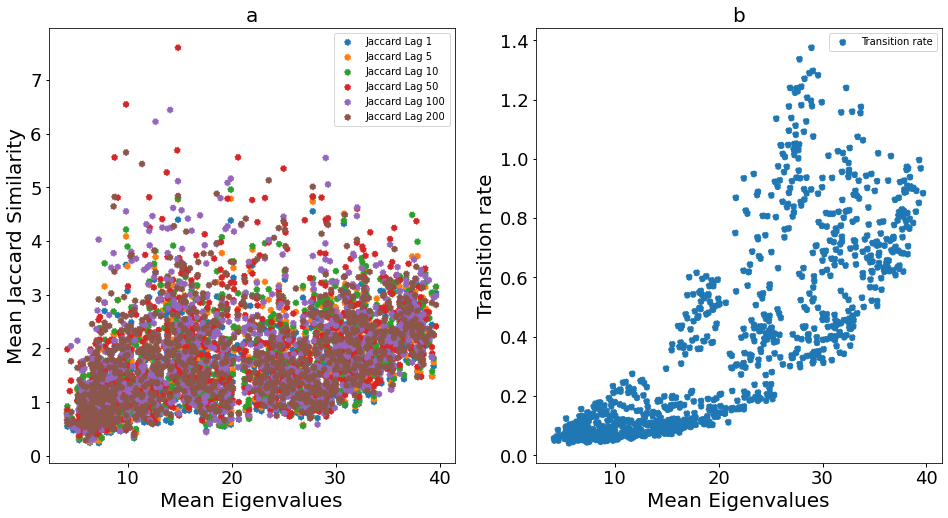

In [69]:
import matplotlib.pyplot as plt

# Create the figure with adjusted figsize
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharex=True, sharey='none')

# Plotting the column means
scatter1 = axs[0].scatter(df_1['Eigen_mean'], df_1['DeltaRAO1'], ls=":", marker="o", alpha=1, label='Jaccard Lag 1')
scatter2 = axs[0].scatter(df_1['Eigen_mean'], df_1['DeltaRAO5'], ls=":", marker="o", alpha=1, label='Jaccard Lag 5')
scatter2 = axs[0].scatter(df_1['Eigen_mean'], df_1['DeltaRAO10'], ls=":", marker="o", alpha=1, label='Jaccard Lag 10')
scatter2 = axs[0].scatter(df_1['Eigen_mean'], df_1['DeltaRAO50'], ls=":", marker="o", alpha=1, label='Jaccard Lag 50')
scatter2 = axs[0].scatter(df_1['Eigen_mean'], df_1['DeltaRAO100'], ls=":", marker="o", alpha=1, label='Jaccard Lag 100')
scatter2 = axs[0].scatter(df_1['Eigen_mean'], df_1['DeltaRAO200'], ls=":", marker="o", alpha=1, label='Jaccard Lag 200')


axs[0].set_ylabel("Mean Jaccard Similarity", fontsize=20)
axs[0].set_xlabel("Mean Eigenvalues", fontsize=20)
axs[0].tick_params(axis='both', labelsize=18)
#axs[0].text(25, 1, "(a)", fontsize=18, va='top')
axs[0].xaxis.set_tick_params(which='both', width=1)
axs[0].yaxis.set_tick_params(which='both', width=1)
axs[0].legend(loc='best')  # Add legend to subplot 0

scatter3 = axs[1].scatter(df_1['Eigen_mean'], df_1["Prod_I_R"], marker='o', ls="--", label='Transition rate')

axs[1].set_ylabel("Transition rate", fontsize=20)
axs[1].set_xlabel("Mean Eigenvalues", fontsize=20)
axs[1].tick_params(axis='both', labelsize=18)
#axs[1].text(25, 1.54, "(b)", fontsize=18, va='top')
axs[1].xaxis.set_tick_params(which='both', width=1)
axs[1].yaxis.set_tick_params(which='both', width=1)
axs[1].legend(loc='best')  # Add legend to subplot 1

# Set titles for subplots
axs[0].set_title("a", fontsize=20)
axs[1].set_title("b", fontsize=20)

plt.show()
